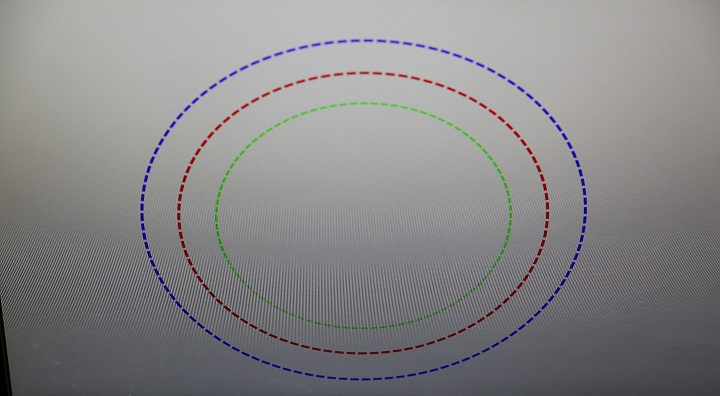

In [0]:
import cv2

from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Hist7.jpg')

#cv2_imshow(img)

res_img = img

cv2_imshow(img)

In [0]:
# Designing Laplacian Kernel.

import numpy as np

# r_channel = np.array([[[0,1,0],[1,-4,1],[0,1,0]],[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]]],np.int32)

# b_channel = np.array([[[1,1,1],[1,1,1],[1,1,1]],[[-1,0,1],[-2,0,2],[-1,0,1]],[[-1,0,1],[-2,0,2],[-1,0,1]]],np.int32)

b_channel = np.array([[[1,1,1],[1,1,1],[1,1,1]],[[-1,-2,-1],[0,0,0],[1,2,1]],[[-1,-2,-1],[0,0,0],[1,2,1]]],np.int32)

# g_channel = np.array([[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],[[0,1,0],[1,-4,1],[0,1,0]],[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]]],np.int32)
g_channel = np.array([[[-1,-2,-1],[0,0,0],[1,2,1]],[[1,1,1],[1,1,1],[1,1,1]],[[-1,-2,-1],[0,0,0],[1,2,1]]],np.int32)

# r_channel = np.array([[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],[[0,1,0],[1,-4,1],[0,1,0]]],np.int32)
r_channel = np.array([[[-1,-2,-1],[0,0,0],[1,2,1]],[[-1,-2,-1],[0,0,0],[1,2,1]],[[1,1,1],[1,1,1],[1,1,1]]],np.int32)

g_channel

array([[[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]]], dtype=int32)

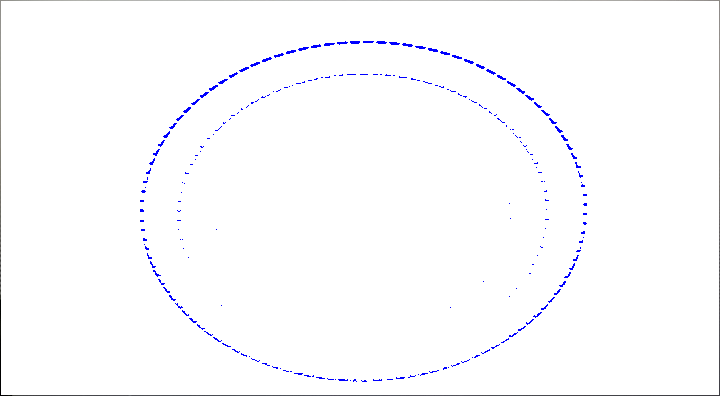

Detected Blue Ellipse !!!


In [0]:
import copy

temp_new_blue  = copy.deepcopy(res_img)

r,c,v = temp_new_blue.shape

for i in range(1,r-1):
  
  for j in range(1,c-1):
    
    temparray_0 = res_img[i-1:i+2,j-1:j+2,0]
    temparray_1 = res_img[i-1:i+2,j-1:j+2,1]
    temparray_2 = res_img[i-1:i+2,j-1:j+2,2]
     
    tempInt_0 = (1/9)*sum(sum(np.multiply(temparray_0,b_channel[0])))
    tempInt_1 = sum(sum(np.multiply(temparray_1,b_channel[1])))
    tempInt_2 = sum(sum(np.multiply(temparray_2,b_channel[2])))
    
    if tempInt_1>=100 and tempInt_2>=100 and tempInt_0>100:
    
      tempInt_0 = 255
      tempInt_1 = 0
      tempInt_2 = 0
      
      
    else:
      
      tempInt_0 = 255
      tempInt_1 = 255
      tempInt_2 = 255
    
    temp_new_blue[i,j,0] = tempInt_0
    temp_new_blue[i,j,1] = tempInt_1
    temp_new_blue[i,j,2] = tempInt_2
    
cv2_imshow(temp_new_blue)
print('Detected Blue Ellipse !!!')

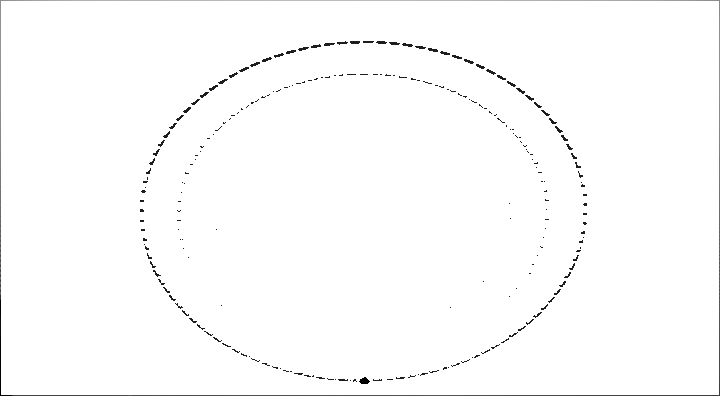

In [0]:
import numpy as np
cimg = cv2.cvtColor(temp_new_blue,cv2.COLOR_BGR2GRAY)

#--- First obtain the threshold using the greyscale image ---
ret,th = cv2.threshold(cimg,127,255, 0)

#--- Find all the contours in the binary image ---
_, contours,hierarchy = cv2.findContours(np.int32(th),cv2.RETR_FLOODFILL,cv2.CHAIN_APPROX_TC89_L1)

cnt = contours
big_contour = []
max = 0
for i in cnt:
  area = cv2.contourArea(i) #--- find the contour having biggest area ---
  if(area > max):
    max = area
    big_contour = i 

final = cv2.drawContours(cimg, contours, 1, (0,255,0), 3)
cv2_imshow(final)

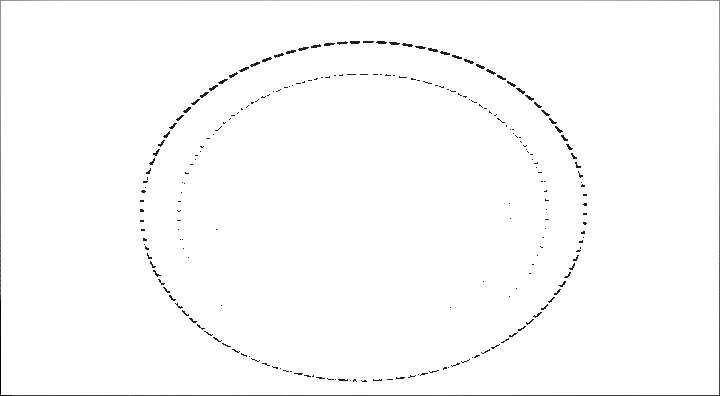

In [0]:
import copy as c

cimg = cv2.cvtColor(temp_new_blue,cv2.COLOR_BGR2GRAY)
cimg2 = c.deepcopy(temp_new_blue)

cv2_imshow(cimg)

for i in range(len(contours)):
  if len(contours[i])>5:
    e = cv2.fitEllipse(contours[i])
    cv2.ellipse(cimg2,e,(255,0,0),2)

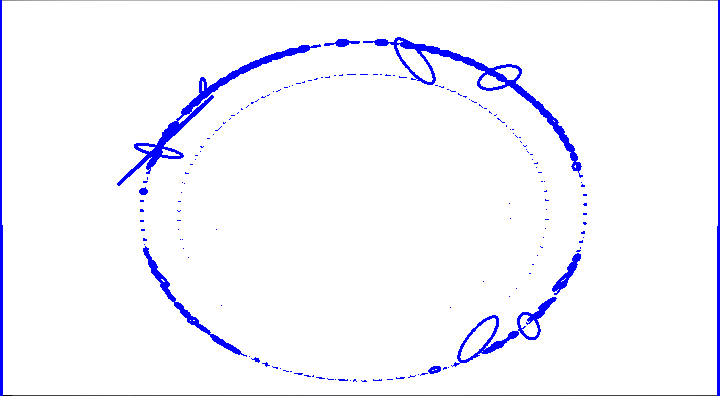

In [0]:
cv2_imshow(cimg2)

In [0]:
comb_cont = contours[0]

for i in range(1,len(contours)):
  comb_cont = np.concatenate((comb_cont,contours[i]))
print(comb_cont)

[[[356 380]]

 [[367 381]]

 [[361 381]]

 ...

 [[339  45]]

 [[337  44]]

 [[337  41]]]


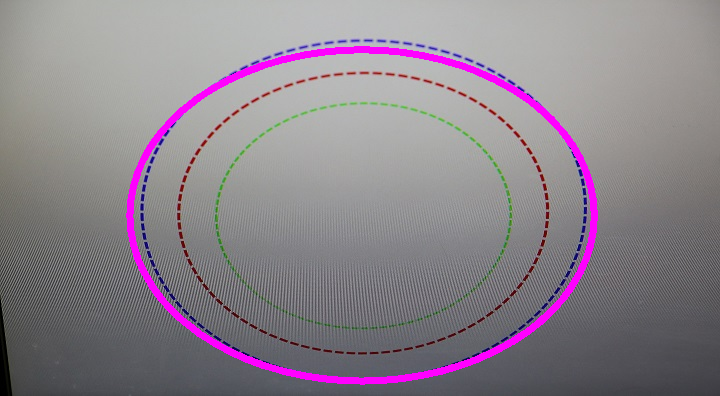

In [0]:
cimg3 = c.deepcopy(img)

e = cv2.fitEllipse((comb_cont))

cv2.ellipse(cimg3,e,(255,0,255),5)

cv2_imshow(cimg3)

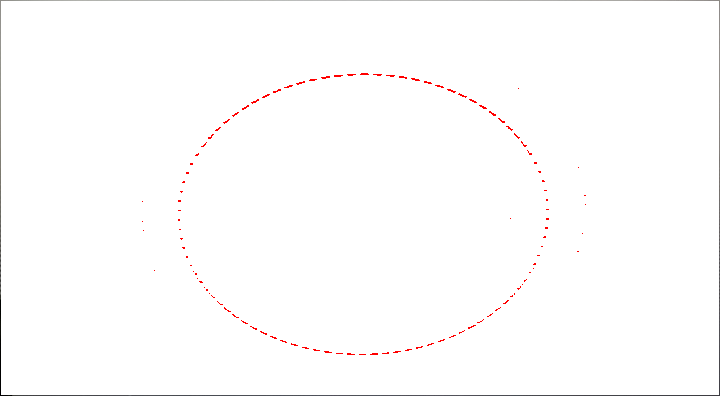

Detected Red Ellipse !!!


In [0]:
import copy

temp_new_green  = copy.deepcopy(res_img)

r,c,v = temp_new_green.shape

for i in range(1,r-1):
  
  for j in range(1,c-1):
    
    temparray_0 = res_img[i-1:i+2,j-1:j+2,0]
    temparray_1 = res_img[i-1:i+2,j-1:j+2,1]
    temparray_2 = res_img[i-1:i+2,j-1:j+2,2]
     
    tempInt_0 = sum(sum(np.multiply(temparray_1,g_channel[0])))
    tempInt_1 = sum(sum(np.multiply(temparray_1,g_channel[1])))
    tempInt_2 = (1/9)*sum(sum(np.multiply(temparray_0,g_channel[2])))
    
    
    
    if tempInt_0>=100 and tempInt_1>=100 and tempInt_2>30:
    
      tempInt_0 = 0
      tempInt_1 = 0
      tempInt_2 = 255
      
      
    else:
      
      tempInt_0 = 255
      tempInt_1 = 255
      tempInt_2 = 255
    
    temp_new_green[i,j,0] = tempInt_0
    temp_new_green[i,j,1] = tempInt_1
    temp_new_green[i,j,2] = tempInt_2
    
cv2_imshow(temp_new_green)
print('Detected Red Ellipse !!!')


In [0]:
count = 0

cord = []

cord = np.ndarray(cord)
for i in range(1,r-1):
  
  for j in range(1,c-1):
    
    if temp_new_green[i,j,2] !=0 and count<=5:
      count+=1
      
      cord.append(np.ndarray[i,j])
    else :
      break
  print(cord)
  
cimg3 = c.deepcopy(img)

e = cv2.fitEllipse((np.ndarray(cord)))

cv2.ellipse(cimg3,e,(0,0,255),5)

cv2_imshow(cimg3)

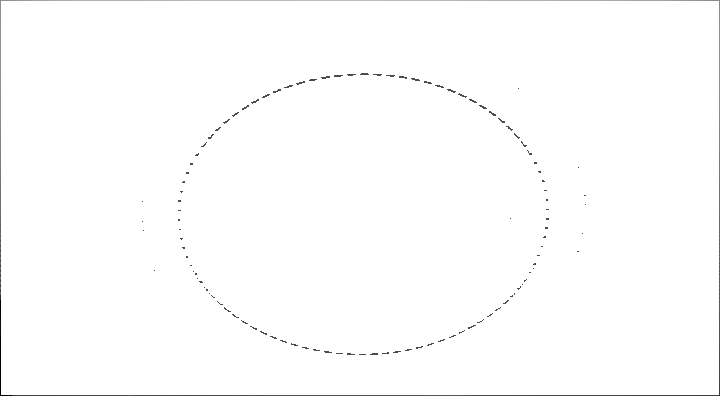

In [0]:
import copy as c

cimg = cv2.cvtColor(temp_new_green,cv2.COLOR_BGR2GRAY)
cimg2 = c.deepcopy(temp_new_green)

cv2_imshow(cimg)

for i in range(len(contours)):
  if len(contours[i])>5:
    e = cv2.fitEllipse(contours[i])
    cv2.ellipse(cimg2,e,(255,0,0),2)

In [0]:
cv2_imshow(cimg2)

comb_cont = contours[0]

for i in range(1,len(contours)):
  comb_cont = np.concatenate((comb_cont,contours[i]))

  print(comb_cont)

In [0]:
points = comb_cont[1:200]

p = points[1:200:40]
cimg3 = c.deepcopy(img)

e = cv2.fitEllipse((points))

cv2.ellipse(cimg3,e,(255,0,0),5)

cv2_imshow(cimg3)

print(p)

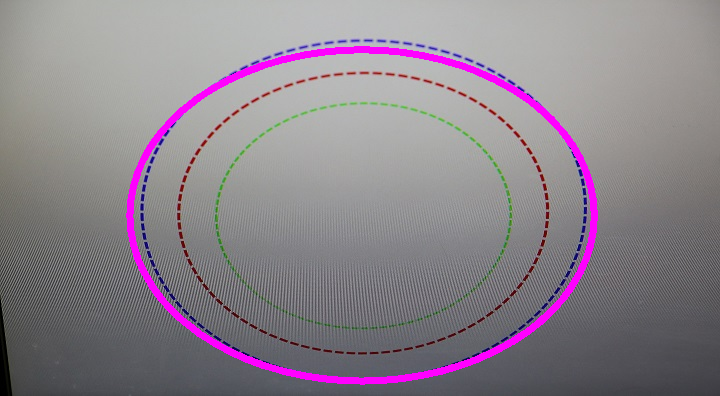

In [0]:
cimg3 = c.deepcopy(img)

e = cv2.fitEllipse((comb_cont))

cv2.ellipse(cimg3,e,(255,0,255),5)

cv2_imshow(cimg3)

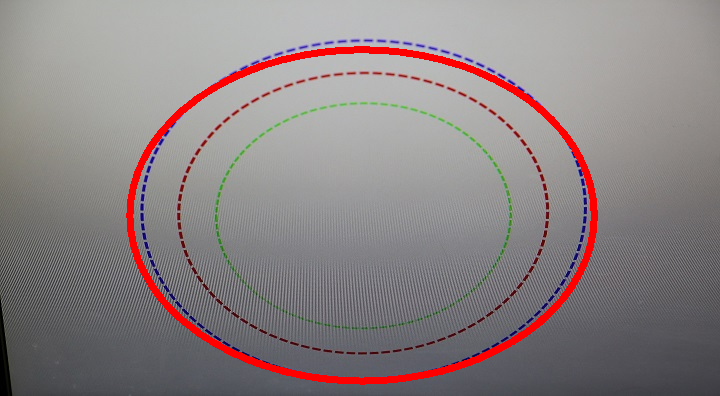

In [0]:
cimg3 = c.deepcopy(img)

e = cv2.fitEllipse((comb_cont))

cv2.ellipse(cimg3,e,(0,0,255),5)

cv2_imshow(cimg3)

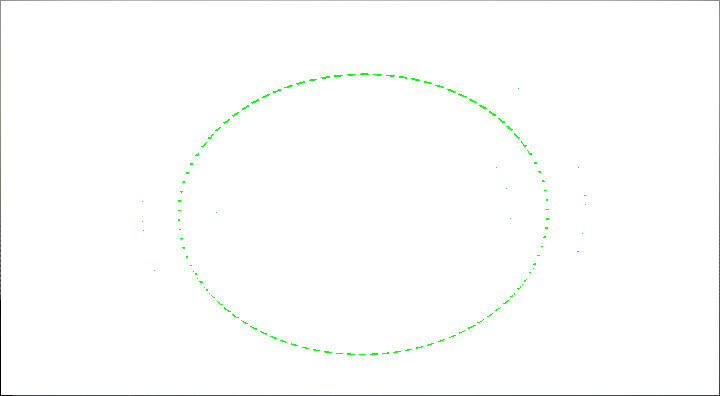

Detected Green Ellipse !!!


In [0]:
import copy

temp_new_green  = copy.deepcopy(res_img)

r,c,v = temp_new_green.shape

for i in range(1,r-1):
  
  for j in range(1,c-1):
    
    temparray_0 = res_img[i-1:i+2,j-1:j+2,0]
    temparray_1 = res_img[i-1:i+2,j-1:j+2,1]
    temparray_2 = res_img[i-1:i+2,j-1:j+2,2]
     
    tempInt_0 = sum(sum(np.multiply(temparray_1,g_channel[0])))
    tempInt_1 = sum(sum(np.multiply(temparray_1,g_channel[1])))
    tempInt_2 = (1/9)*sum(sum(np.multiply(temparray_0,g_channel[2])))
    
    
    
    if tempInt_0>=80 and tempInt_1>=80 and tempInt_2>30:
    
      tempInt_0 = 0
      tempInt_1 = 255
      tempInt_2 = 0
      
      
    else:
      
      tempInt_0 = 255
      tempInt_1 = 255
      tempInt_2 = 255
    
    temp_new_green[i,j,0] = tempInt_0
    temp_new_green[i,j,1] = tempInt_1
    temp_new_green[i,j,2] = tempInt_2
    
cv2_imshow(temp_new_green)
print('Detected Green Ellipse !!!')


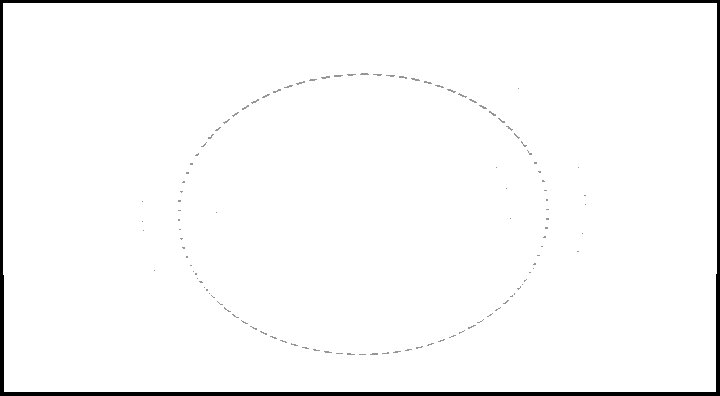

In [0]:
import numpy as np
cimg = cv2.cvtColor(temp_new_green,cv2.COLOR_BGR2GRAY)

#--- First obtain the threshold using the greyscale image ---
ret,th = cv2.threshold(cimg,127,255, 0)

#--- Find all the contours in the binary image ---
_, contours,hierarchy = cv2.findContours(np.int32(th),cv2.RETR_FLOODFILL,cv2.CHAIN_APPROX_TC89_L1)

cnt = contours
big_contour = []
max = 0
for i in cnt:
  area = cv2.contourArea(i) #--- find the contour having biggest area ---
  if(area > max):
    max = area
    big_contour = i 

final = cv2.drawContours(cimg, contours, 1, (0,255,0), 3)
cv2_imshow(final)

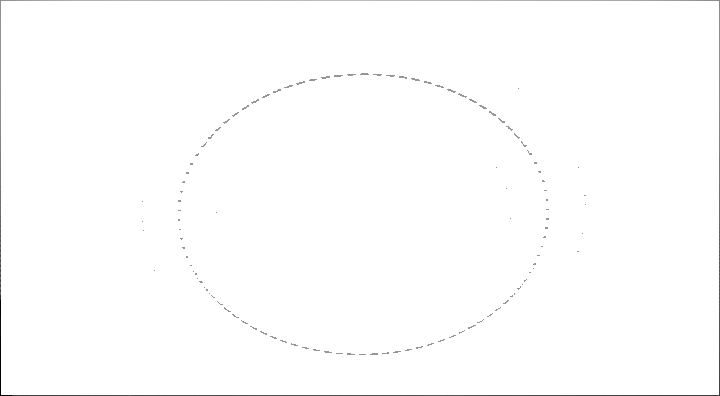

[array([[[720, 152]],

       [[718, 395]],

       [[  0, 394]],

       [[ -1, 154]],

       [[  0,  -1]],

       [[720,   0]]], dtype=int32), array([[[  0,   0]],

       [[  0, 154]],

       [[  1, 394]],

       [[718, 394]],

       [[719, 152]],

       [[719,   0]]], dtype=int32)]


In [0]:
import copy as c

cimg = cv2.cvtColor(temp_new_green,cv2.COLOR_BGR2GRAY)
cimg2 = c.deepcopy(temp_new_green)

cv2_imshow(cimg)
print(contours)

for i in range(len(contours)):
  if len(contours[i])>5:
    e = cv2.fitEllipse(contours[i])
    cv2.ellipse(cimg2,e,(255,0,0),2)

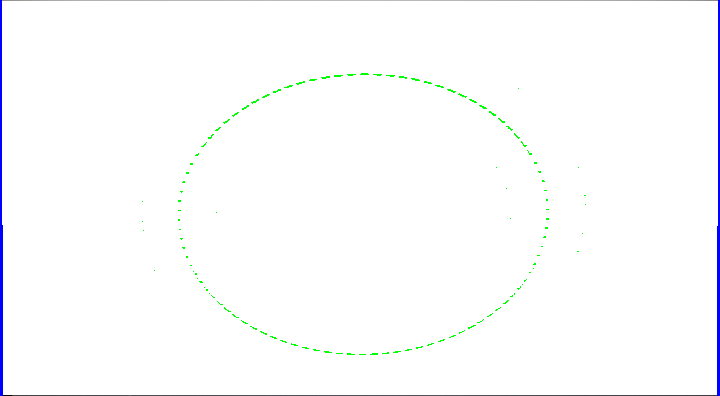

[[[720 152]]

 [[718 395]]

 [[  0 394]]

 [[ -1 154]]

 [[  0  -1]]

 [[720   0]]

 [[  0   0]]

 [[  0 154]]

 [[  1 394]]

 [[718 394]]

 [[719 152]]

 [[719   0]]]


In [0]:
cv2_imshow(cimg2)

comb_cont = contours[0]

for i in range(1,len(contours)):
  comb_cont = np.concatenate((comb_cont,contours[i]))
print(comb_cont)

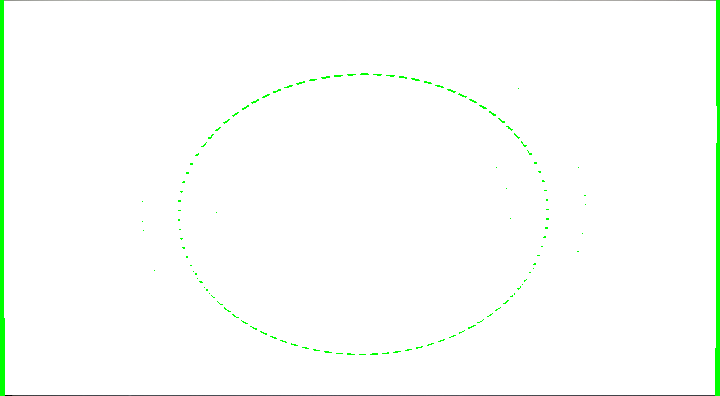

In [0]:
cimg3 = c.deepcopy(temp_new_green)

e = cv2.fitEllipse((comb_cont))

cv2.ellipse(cimg3,e,(0,255,0),5)

cv2_imshow(cimg3)